In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


# University of Strathclyde - MSc Artificial Intelligence and Applications

# CS982 - Big Data Technologies

File Created first created 13th October 2019 by Barry Smart.

## Stage 7 - Analysis Of Relationships Between Variables
The purpose of this notebook is to do analysis of the core data items that are of interest:
- Life expectancy;
- Economic prosperity;
- Population growth.


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from pandas.plotting import scatter_matrix
import assignment1.helper_functions as hf


In [2]:
region_ranking = ["North America", "Europe & Central Asia", "Middle East & North Africa",\
    "Latin America & Caribbean", "East Asia & Pacific", "South Asia", "Sub-Saharan Africa"]
region_palette = {"North America" : "red", "Europe & Central Asia" : "blue",\
    "Middle East & North Africa" : "pink", "Latin America & Caribbean" : "purple",\
        "East Asia & Pacific" : "green", "South Asia" : "orange", "Sub-Saharan Africa" : "gray"}
income_palette = {"High income" : "red", "Upper middle income" : "orange",\
    "Lower middle income" : "green", "Low income" : "blue"}


## Stage 7.1 - Read The File
 Read in the file that was generated from the previous script.

In [3]:
data_path = str(os.getcwd()) + "\\assignment1\\"
interpolated_data_set = pd.read_pickle(data_path + "interpolated_data_set.pkl")

 This step was added retrospectively, because inspection of the data shows that we will be required to work with "Log GDP" in order to generate more meaningful analysis.

In [4]:
interpolated_data_set["Log GDP per Capita"] = np.log10(interpolated_data_set["GDP per capita (current US$)"])
interpolated_data_set_flattened = interpolated_data_set.reset_index()

interpolated_data_set_short_column_titles, list_of_columns = hf.assign_short_variable_names(interpolated_data_set, 18)
interpolated_data_set_short_column_titles_flattened = interpolated_data_set_short_column_titles.reset_index()


## Stage 7.2 - Heat Map Analysis of Correlations
 In this section I will analyse data for 2018 in more depth with the purpose of:
 - Generating some initial insights into the data;
 - Trying to bring out the correlations between data;

### Initial Correlation Matric
 Run a quick analysis using a corelation matrix.

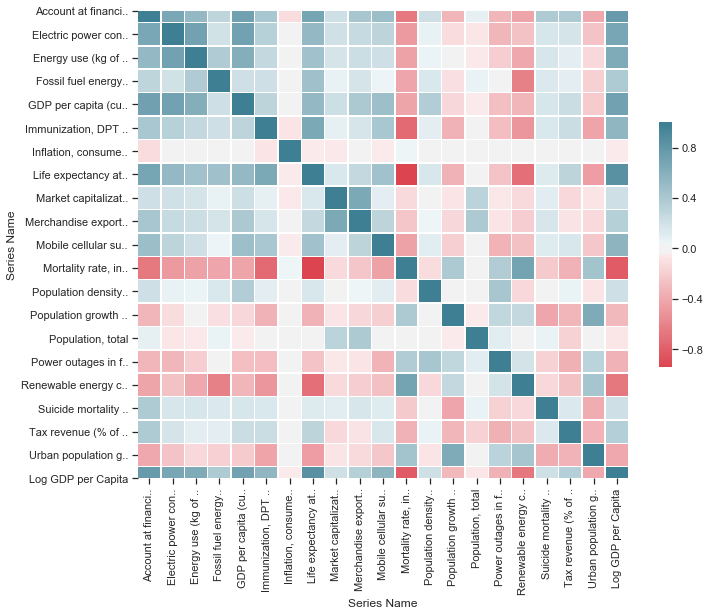

In [5]:
# Compute the correlation matrix
correlation_matrix = interpolated_data_set_short_column_titles.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(correlation_matrix, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

sns.set(style="ticks")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix,\
    #mask=mask,\
    cmap=cmap,\
    vmax=1, center=0,\
    square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [6]:
### Stage 7.3 - Pair Plot
# Looking at the correlations above, pick out a smaller set of varaibles that have a strong correlation with Life Expectancy:
# - Mortality Rate, Infant
# - Log GDP Per Capita
# - Renewable Energy Usage
#  
# I will also run this analysis on a single year so as not to skew the results based on time series drift.
#

In [7]:
# This helper function will help me to grab data for a single year and for a smaller set of variables
def get_data_for_year(dataframe, year, list_of_columns):
    data_for_single_year = dataframe.xs(year, level="Year", drop_level=False)
    # Flatten and select only the columns I need
    data_for_single_year_flattened_and_trimmed = data_for_single_year.reset_index()[list_of_columns]
    return data_for_single_year_flattened_and_trimmed

#["Region", "Country", "Year", "GDP per capita (current US$)", "Life expectancy at birth, total (years)", "Population, total", "Population growth (annual %)"]


In [8]:
data_for_pair_plot = get_data_for_year(interpolated_data_set_short_column_titles, 2018,\
    ['Income Group', 'Life expectancy at..', 'Mortality rate, in..', 'Renewable energy c..', 'Log GDP per Capita'])

data_for_pair_plot = data_for_pair_plot.dropna()
data_for_pair_plot


Series Name,Income Group,Life expectancy at..,"Mortality rate, in..",Renewable energy c..,Log GDP per Capita
0,High income,82.497561,3.1,9.180503,4.758195
1,High income,75.585000,9.8,0.014935,4.500068
5,High income,84.099756,1.8,6.297357,4.594246
6,High income,82.626829,2.7,2.707703,4.496414
9,High income,81.658537,4.7,30.789176,4.622898
...,...,...,...,...,...
212,Upper middle income,58.061000,62.6,7.822800,4.007490
213,Upper middle income,65.839000,32.7,82.007844,3.904706
214,Upper middle income,74.514634,13.6,11.537362,4.050716
215,Upper middle income,63.021000,29.0,26.468430,3.773161


Text(0.5, 1.02, 'Analysis of Variables With Strongest Correlations For Year 2018')

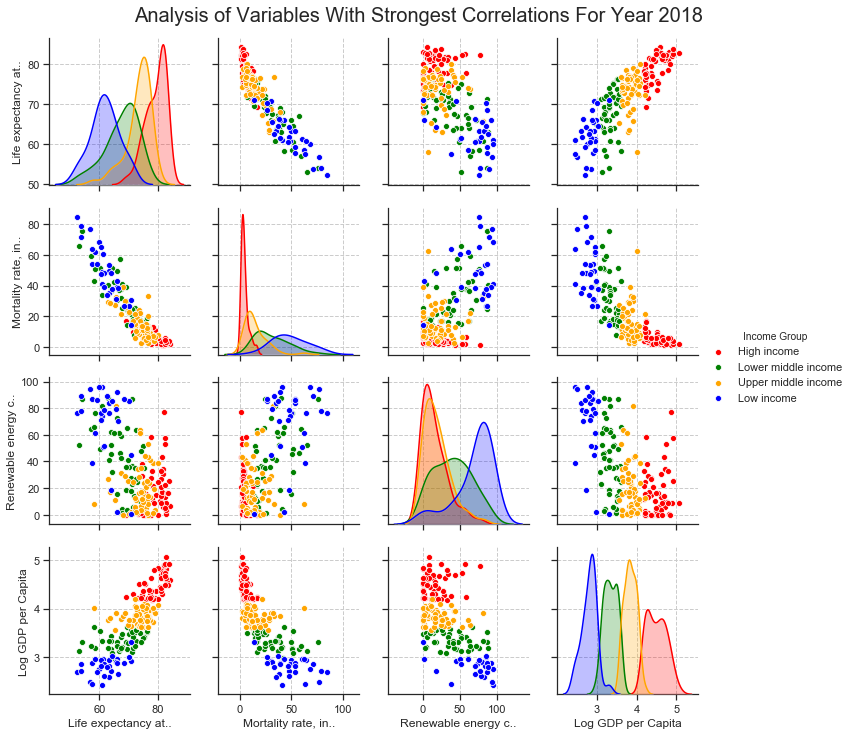

In [9]:
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '--', 
    'axes.titlesize' : 18, 'lines.linewidth' : 3, 'axes.labelsize' : 16, 'xtick.labelsize' : 16,\
    'ytick.labelsize' : 16})
chart = sns.pairplot(data_for_pair_plot, hue="Income Group", palette=income_palette)
chart.fig.suptitle("Analysis of Variables With Strongest Correlations For Year 2018", y=1.02, fontsize=20)


In [10]:
### Stage 7.4 - Correlation Between Log GDP and Life Expectancy
#


Text(0.5, 1.02, 'Analysis of Correlation Between\nLog GDP and Life Expectancy')

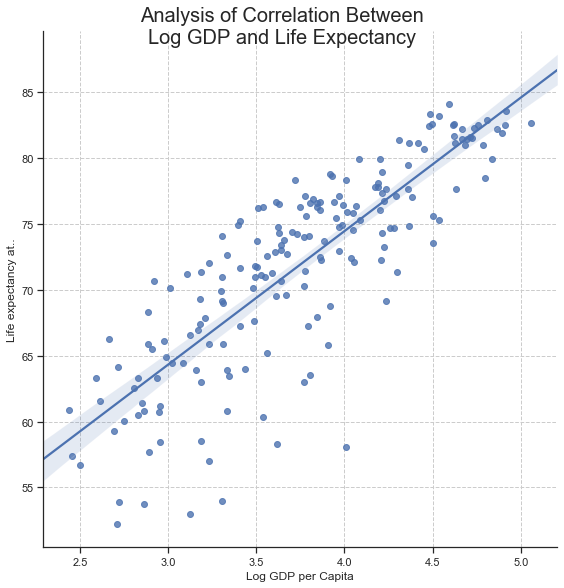

In [11]:
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '--', 
    'axes.titlesize' : 18, 'lines.linewidth' : 3, 'axes.labelsize' : 16, 'xtick.labelsize' : 16,\
    'ytick.labelsize' : 16})
chart = sns.lmplot(x='Log GDP per Capita', y='Life expectancy at..',\
    height=8, data=data_for_pair_plot)
chart.fig.suptitle("Analysis of Correlation Between\nLog GDP and Life Expectancy", y=1.02, fontsize=20)


In [12]:
### Stage 7.5 - Correlation Between Log GDP and Life Expectancy
#


In [13]:
# Setting up consistent method of plotting the data with 5 dimensions!
def country_scatterplot(country_dataframe, title, x_column, y_column, hue_column, size_column, x_min, x_max, x_scale="linear", points_of_interest=False, label_maxs_and_mins=True):
    # Set up the style and size of the plot
    sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
    f, ax = plt.subplots(figsize=(10, 10))
    ax.set(xscale=x_scale)
    ax.set_xlim(x_min, x_max)
    # Now plot the data
    chart = sns.scatterplot(x=x_column, y=y_column,\
        hue=hue_column,\
        size=size_column,\
        palette=region_palette,\
        hue_order=region_ranking,\
        sizes=(50,5000), linewidth=1,\
        alpha=1,\
        data=country_dataframe, ax=ax)
    chart.axes.set_title(title,fontsize=20)
    # Grab the handles and lavels for the legend
    h,l = ax.get_legend_handles_labels()
    # Prune the legend to the 7 Regions only - therefore removing the size legend
    new_legend = plt.legend(h[:8], l[:8], loc='best', ncol=1)
    # Add the new legend to the plot
    plt.gca().add_artist(new_legend)
    # Check to see if points of interest have been specified
    if points_of_interest:
        hf.plot_points_of_interest(country_dataframe, points_of_interest,\
                x_column, y_column, size_column, "Country", ax)
    # Check if maximum and minimum values for x, y and size should be plotted
    if label_maxs_and_mins:
        hf.label_max_and_mins(country_dataframe, x_column, y_column, size_column, "Country", ax)

    plt.show()


# This helper function will help me to grab data for a single year and for a smaller set of variables
def get_data_for_year(dataframe, year, list_of_columns):
    data_for_single_year = dataframe.xs(year, level="Year", drop_level=False)
    # Flatten and select only the columns I need
    data_for_single_year_flattened_and_trimmed = data_for_single_year.reset_index()[list_of_columns]
    return data_for_single_year_flattened_and_trimmed

#["Region", "Country", "Year", "GDP per capita (current US$)", "Life expectancy at birth, total (years)", "Population, total", "Population growth (annual %)"]


In [14]:
data_for_hans_rosling_scatter_1960 = get_data_for_year(interpolated_data_set, 1960,\
    ["Region", "Country", "Year", "GDP per capita (current US$)", "Life expectancy at birth, total (years)", "Population, total"])
data_for_hans_rosling_scatter_1960



Series Name,Region,Country,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total"
0,East Asia & Pacific,Australia,1960,1807.785710,70.817073,10276477.0
1,East Asia & Pacific,Brunei,1960,NaN,54.810000,81702.0
2,East Asia & Pacific,French Polynesia,1960,NaN,56.282000,78076.0
3,East Asia & Pacific,Guam,1960,NaN,60.970000,66742.0
4,East Asia & Pacific,"Hong Kong SAR, China",1960,429.442874,66.961683,3075605.0
...,...,...,...,...,...,...
209,Sub-Saharan Africa,Equatorial Guinea,1960,NaN,36.535000,255333.0
210,Sub-Saharan Africa,Gabon,1960,282.413795,39.694000,500928.0
211,Sub-Saharan Africa,Mauritius,1960,NaN,58.745220,659351.0
212,Sub-Saharan Africa,Namibia,1960,NaN,46.483000,634142.0


In [15]:
data_for_hans_rosling_scatter_2018 = get_data_for_year(interpolated_data_set, 2018,\
    ["Region", "Country", "Year", "GDP per capita (current US$)", "Life expectancy at birth, total (years)", "Population, total"])
data_for_hans_rosling_scatter_2018



Series Name,Region,Country,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total"
0,East Asia & Pacific,Australia,2018,57305.299016,82.497561,24992369.0
1,East Asia & Pacific,Brunei,2018,31627.742079,75.585000,428962.0
2,East Asia & Pacific,French Polynesia,2018,14323.820820,77.251000,277679.0
3,East Asia & Pacific,Guam,2018,35664.501677,79.631000,165768.0
4,East Asia & Pacific,"Hong Kong SAR, China",2018,48717.291214,84.680488,7451000.0
...,...,...,...,...,...,...
212,Sub-Saharan Africa,Equatorial Guinea,2018,10173.963020,58.061000,1308974.0
213,Sub-Saharan Africa,Gabon,2018,8029.822384,65.839000,2119275.0
214,Sub-Saharan Africa,Mauritius,2018,11238.690395,74.514634,1265303.0
215,Sub-Saharan Africa,Namibia,2018,5931.453885,63.021000,2448255.0


In [16]:
#### Hans Rosling Inspired Scatter Plot 1960
#


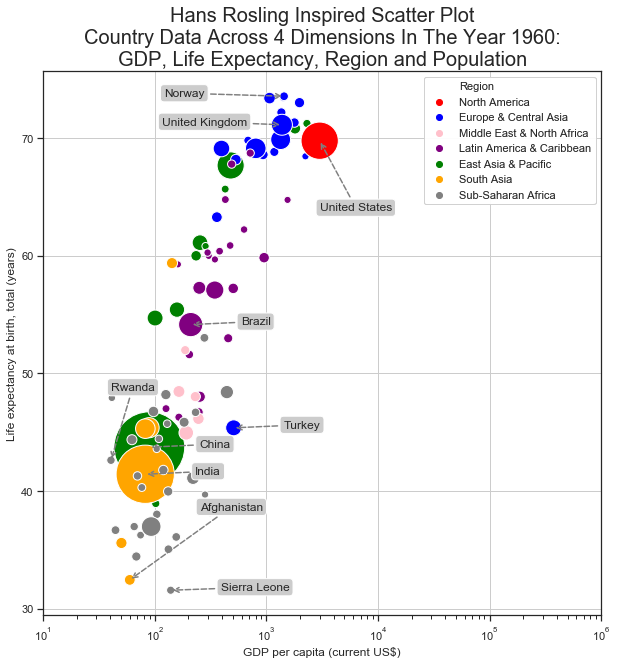

In [17]:
# Going to set the max and min for the X axis (GDP) based on the entire data set of 59 years to show how it has moved
min_power, min_value, max_power, max_value = hf.find_min_and_max(interpolated_data_set_flattened, "GDP per capita (current US$)")

country_scatterplot(data_for_hans_rosling_scatter_1960, "Hans Rosling Inspired Scatter Plot\nCountry Data Across 4 Dimensions In The Year 1960:\nGDP, Life Expectancy, Region and Population",\
    "GDP per capita (current US$)", "Life expectancy at birth, total (years)", "Region", "Population, total",\
        min_value, max_value, x_scale="log",\
            points_of_interest=[("India", "QP"), ("United Kingdom", "QT"), ("Norway", "QT"), ("Sierra Leone", "QP"), ("China", "QP"), ("United States", "HP"), ("Afghanistan", "TR"), ("Rwanda", "OC"), ("Turkey", "QP"), ("Brazil", "QP")],\
                label_maxs_and_mins=False)


In [18]:
life_expectancy_league_table_1960 = data_for_hans_rosling_scatter_1960[["Region", "Country", "Life expectancy at birth, total (years)", "GDP per capita (current US$)"]].sort_values(by="Life expectancy at birth, total (years)").dropna()


In [19]:
life_expectancy_league_table_1960.head(10)


Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
184,Sub-Saharan Africa,Sierra Leone,31.566,138.938760
158,South Asia,Afghanistan,32.446,59.773194
168,Sub-Saharan Africa,Burkina Faso,34.432,68.424749
182,Sub-Saharan Africa,Niger,35.053,132.652162
159,South Asia,Nepal,35.583,50.304988
196,Sub-Saharan Africa,Côte d'Ivoire,36.095,155.899900
170,Sub-Saharan Africa,Central African Republic,36.249,74.687347
179,Sub-Saharan Africa,Malawi,36.672,44.523894
185,Sub-Saharan Africa,Somalia,36.976,65.479597
202,Sub-Saharan Africa,Nigeria,36.976,92.960470


In [20]:
life_expectancy_league_table_1960.tail(10)



Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
48,Europe & Central Asia,France,69.868293,1343.827372
0,East Asia & Pacific,Australia,70.817073,1807.785710
73,Europe & Central Asia,United Kingdom,71.126829,1380.306241
9,East Asia & Pacific,New Zealand,71.236585,2312.949992
72,Europe & Central Asia,Switzerland,71.313415,1787.360348
44,Europe & Central Asia,Denmark,72.176585,1364.517160
71,Europe & Central Asia,Sweden,73.005610,1983.106544
63,Europe & Central Asia,Netherlands,73.392683,1068.784587
54,Europe & Central Asia,Iceland,73.423171,1414.982269
64,Europe & Central Asia,Norway,73.549756,1441.755660


In [21]:
gdp_league_table_1960 = data_for_hans_rosling_scatter_1960[["Region", "Country", "Life expectancy at birth, total (years)", "GDP per capita (current US$)"]].sort_values(by="GDP per capita (current US$)").dropna()


In [22]:
gdp_league_table_1960.head(10)

Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
183,Sub-Saharan Africa,Rwanda,42.616,40.537115
200,Sub-Saharan Africa,Lesotho,47.919,41.300069
179,Sub-Saharan Africa,Malawi,36.672,44.523894
159,South Asia,Nepal,35.583,50.304988
158,South Asia,Afghanistan,32.446,59.773194
208,Sub-Saharan Africa,Botswana,49.179,60.492514
190,Sub-Saharan Africa,Uganda,44.359,62.509598
185,Sub-Saharan Africa,Somalia,36.976,65.479597
168,Sub-Saharan Africa,Burkina Faso,34.432,68.424749
169,Sub-Saharan Africa,Burundi,41.281,70.051735


In [23]:
gdp_league_table_1960.tail(10)


Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
73,Europe & Central Asia,United Kingdom,71.126829,1380.306241
54,Europe & Central Asia,Iceland,73.423171,1414.982269
64,Europe & Central Asia,Norway,73.549756,1441.755660
105,Latin America & Caribbean,The Bahamas,64.740000,1550.239392
72,Europe & Central Asia,Switzerland,71.313415,1787.360348
0,East Asia & Pacific,Australia,70.817073,1807.785710
71,Europe & Central Asia,Sweden,73.005610,1983.106544
61,Europe & Central Asia,Luxembourg,68.446390,2242.015817
9,East Asia & Pacific,New Zealand,71.236585,2312.949992
157,North America,United States,69.770732,3007.123445


In [24]:
#### Hans Rosling Inspired Scatter Plot 2018
#


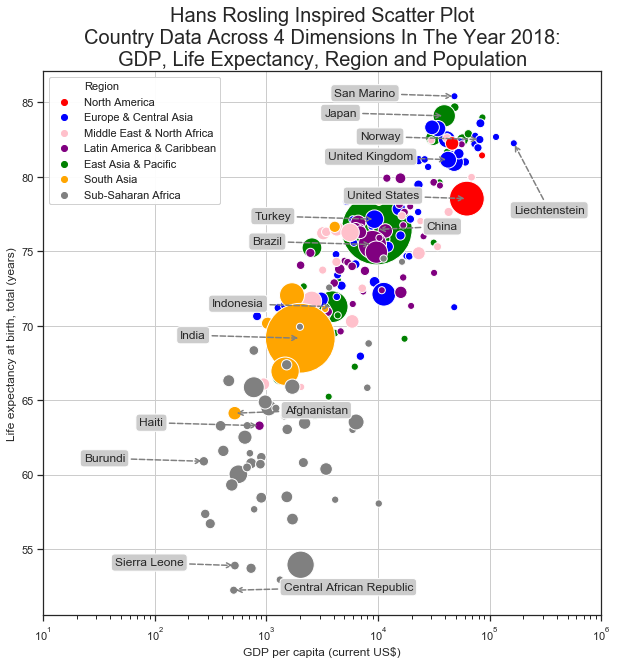

In [25]:
country_scatterplot(data_for_hans_rosling_scatter_2018, "Hans Rosling Inspired Scatter Plot\nCountry Data Across 4 Dimensions In The Year 2018:\nGDP, Life Expectancy, Region and Population",\
    "GDP per capita (current US$)", "Life expectancy at birth, total (years)", "Region", "Population, total",\
        min_value, max_value, x_scale="log",\
            points_of_interest=[("India", "QT"), ("United Kingdom", "QT"), ("Haiti", "QT"), ("Norway", "QT"), ("Central African Republic", "QP"), ("San Marino", "QT"), ("Burundi", "QT"), ("China", "QP"), ("United States", "QT"), ("Afghanistan", "QP"), ("Liechtenstein", "HP"), ("Indonesia", "QT"), ("Brazil", "QT"), ("Turkey", "QT"), ("Japan", "QT"), ("Sierra Leone", "QT")],\
                label_maxs_and_mins=False)


In [26]:
life_expectancy_league_table_2018 = data_for_hans_rosling_scatter_2018[["Region", "Country", "Life expectancy at birth, total (years)", "GDP per capita (current US$)"]].sort_values(by="Life expectancy at birth, total (years)").dropna()


In [27]:
life_expectancy_league_table_2018.head(10)


Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
173,Sub-Saharan Africa,Central African Republic,52.240,509.970975
203,Sub-Saharan Africa,Lesotho,52.947,1324.282768
174,Sub-Saharan Africa,Chad,53.712,730.244608
187,Sub-Saharan Africa,Sierra Leone,53.895,522.858128
205,Sub-Saharan Africa,Nigeria,53.950,2028.181970
188,Sub-Saharan Africa,Somalia,56.709,314.562363
199,Sub-Saharan Africa,Côte d'Ivoire,57.017,1715.531238
189,Sub-Saharan Africa,South Sudan,57.365,283.487802
179,Sub-Saharan Africa,Guinea-Bissau,57.673,777.969922
212,Sub-Saharan Africa,Equatorial Guinea,58.061,10173.963020


In [28]:
life_expectancy_league_table_2018.tail(10)


Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
61,Europe & Central Asia,Luxembourg,82.685366,114340.498742
40,Europe & Central Asia,Channel Islands,82.766000,74462.646747
12,East Asia & Pacific,Singapore,82.895122,64581.944018
57,Europe & Central Asia,Italy,83.243902,34318.351124
70,Europe & Central Asia,Spain,83.329268,30523.859239
72,Europe & Central Asia,Switzerland,83.602439,82838.929445
7,East Asia & Pacific,"Macao SAR, China",83.989000,86355.407652
5,East Asia & Pacific,Japan,84.099756,39286.737649
4,East Asia & Pacific,"Hong Kong SAR, China",84.680488,48717.291214
67,Europe & Central Asia,San Marino,85.417073,48494.551411


In [29]:
gdp_league_table_2018 = data_for_hans_rosling_scatter_2018[["Region", "Country", "Life expectancy at birth, total (years)", "GDP per capita (current US$)"]].sort_values(by="GDP per capita (current US$)").dropna()


In [30]:
gdp_league_table_2018.head(10)

Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
172,Sub-Saharan Africa,Burundi,60.898,275.429603
189,Sub-Saharan Africa,South Sudan,57.365,283.487802
188,Sub-Saharan Africa,Somalia,56.709,314.562363
182,Sub-Saharan Africa,Malawi,63.279,389.398033
185,Sub-Saharan Africa,Niger,61.599,411.688943
181,Sub-Saharan Africa,Madagascar,66.311,460.752781
184,Sub-Saharan Africa,Mozambique,59.309,490.167582
173,Sub-Saharan Africa,Central African Republic,52.240,509.970975
161,South Asia,Afghanistan,64.130,520.896603
187,Sub-Saharan Africa,Sierra Leone,53.895,522.858128


In [31]:
gdp_league_table_2018.tail(10)



Series Name,Region,Country,"Life expectancy at birth, total (years)",GDP per capita (current US$)
54,Europe & Central Asia,Iceland,82.204878,73201.702550
40,Europe & Central Asia,Channel Islands,82.766000,74462.646747
55,Europe & Central Asia,Ireland,81.956098,78806.431996
56,Europe & Central Asia,Isle of Man,77.965854,79155.541672
64,Europe & Central Asia,Norway,82.509756,81807.198039
72,Europe & Central Asia,Switzerland,83.602439,82838.929445
158,North America,Bermuda,81.441951,85748.065414
7,East Asia & Pacific,"Macao SAR, China",83.989000,86355.407652
61,Europe & Central Asia,Luxembourg,82.685366,114340.498742
59,Europe & Central Asia,Liechtenstein,82.258537,165028.245029
